In [1]:
#Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#Variable Tag Designation
#Death Rate = der
#Emissions = ems

#Help function
#help(pd.read_csv)

#Load the data and read it into a variable(s)

der =  pd.read_csv("VSD37.20211112T091111.csv")
ems = pd.read_csv("EAA16.20211112T091129.csv")

In [3]:
#display all columns and rows specified
pd.set_option("display.max_columns", None)
pd.set_option("max_rows", None)

<---------------------------------------------------------------------------------------------------------------------------------------------------->

Death Rates https://data.cso.ie/ Title VSD37 (Deaths 2013-2018)

In [4]:
##Display Data (der) to confirm suitability
der.head(5)

STATISTIC Statistic  TLIST(A1)  Year C01888V02321 Area of Residence  \
0     VSD37    Deaths       2013  2013           1-           Wicklow   
1     VSD37    Deaths       2013  2013           10            Carlow   
2     VSD37    Deaths       2013  2013           11           Kildare   
3     VSD37    Deaths       2013  2013           12          Kilkenny   
4     VSD37    Deaths       2013  2013           13             Laois   

  C03560V04296       Place of Occurrence    UNIT  VALUE  
0            -  All places of occurrence  Number    796  
1            -  All places of occurrence  Number    389  
2            -  All places of occurrence  Number    924  
3            -  All places of occurrence  Number    643  
4            -  All places of occurrence  Number    443

In [5]:
#Determine the names of columns, the datatypes contained and if there are any null (NaN) values present.
der.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STATISTIC            120 non-null    object
 1   Statistic            120 non-null    object
 2   TLIST(A1)            120 non-null    int64 
 3   Year                 120 non-null    int64 
 4   C01888V02321         120 non-null    object
 5   Area of Residence    120 non-null    object
 6   C03560V04296         120 non-null    object
 7   Place of Occurrence  120 non-null    object
 8   UNIT                 120 non-null    object
 9   VALUE                120 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 9.5+ KB


In [6]:
#Alternatively - directly look for null value, False indicates the presence of data (no null values)
der.isna().any()

STATISTIC              False
Statistic              False
TLIST(A1)              False
Year                   False
C01888V02321           False
Area of Residence      False
C03560V04296           False
Place of Occurrence    False
UNIT                   False
VALUE                  False
dtype: bool

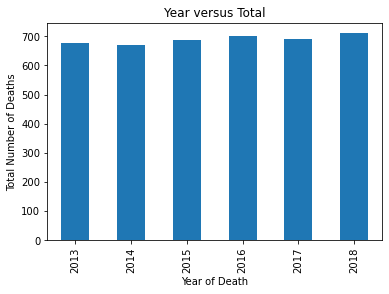

In [7]:
#Initial visualisation of Dataset
#Group the data by Year and Mean number of deaths per year
#Plot the data using a Bar Chart
death_per_year=der.groupby("Year")["VALUE"].mean()
death_per_year.plot(kind="bar")
plt.xlabel("Year of Death")
plt.ylabel('Total Number of Deaths')
plt.title("Year versus Total")
plt.show()

In [8]:
#Conclusion: A bar chart in this instance yields no useful information

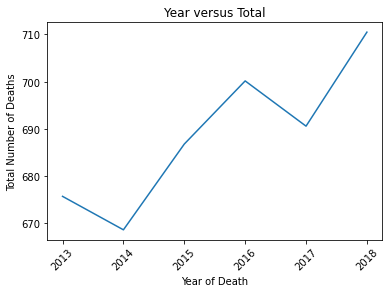

In [9]:
#A Line Graph will be a better fit for numerical data tracked over time
death_per_year.plot(kind="line", rot=45)
plt.xlabel("Year of Death")
plt.ylabel('Total Number of Deaths')
plt.title("Year versus Total")
plt.show()

In [10]:
#Conclusion: The Line Graph clearly demonstrates that there is an increase in the number of deaths on average between 2013 to 2018

In [11]:
#Add an attributes to the Dataframe and round the resultant figure to 0 dp
#This attribute will be used to compare the counties to the overall country during future analysis.
der["DEATH_MEAN"]=round((der["VALUE"].mean()))

In [12]:
#Group Area of Residence and calculate the total number of deaths from 2013 to 2018
#der.groupby("Area of Residence")["VALUE"].sum()

In [13]:
#Display Data (der) to confirm suitability and confirm attribute added to DF
der.head()

STATISTIC Statistic  TLIST(A1)  Year C01888V02321 Area of Residence  \
0     VSD37    Deaths       2013  2013           1-           Wicklow   
1     VSD37    Deaths       2013  2013           10            Carlow   
2     VSD37    Deaths       2013  2013           11           Kildare   
3     VSD37    Deaths       2013  2013           12          Kilkenny   
4     VSD37    Deaths       2013  2013           13             Laois   

  C03560V04296       Place of Occurrence    UNIT  VALUE  DEATH_MEAN  
0            -  All places of occurrence  Number    796         689  
1            -  All places of occurrence  Number    389         689  
2            -  All places of occurrence  Number    924         689  
3            -  All places of occurrence  Number    643         689  
4            -  All places of occurrence  Number    443         689

In [14]:
#Create an Index using the Year and Area of Residence
#der_df = der_df.set_index(["Year","Area of Residence"]).sort_index()

In [15]:
#The CSV file contains redundant data which is not of importance.  The following code returns the attributes of interest.

#Death Rate
der_df = der[["Year", "Statistic", "Area of Residence","UNIT", "VALUE", "DEATH_MEAN"]]

#Display Data (der) to confirm that the required data is present
der_df.head()

Year Statistic Area of Residence    UNIT  VALUE  DEATH_MEAN
0  2013    Deaths           Wicklow  Number    796         689
1  2013    Deaths            Carlow  Number    389         689
2  2013    Deaths           Kildare  Number    924         689
3  2013    Deaths          Kilkenny  Number    643         689
4  2013    Deaths             Laois  Number    443         689

In [16]:
#Order the Death Rate Data for easier visual examination - Order by Year then Area of Residence
der_df = der_df.sort_values(["Year", "Area of Residence"], ascending = [True, True])

<Figure size 30000x15000 with 0 Axes>

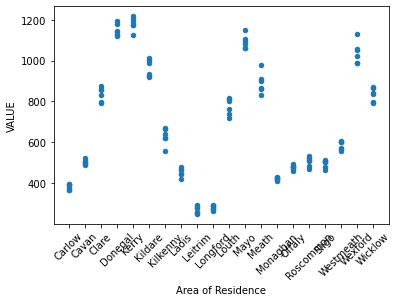

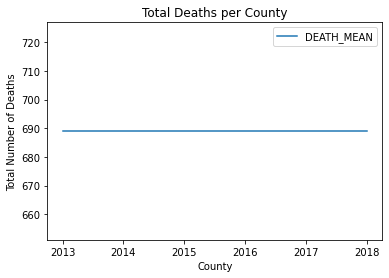

In [17]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
#Tried to increase the dimensions of the graph to make the x axis tags easier to read.
from matplotlib.pyplot import figure
figure(num=None, figsize=[100, 50], dpi=300)

#Scatter Plot used to analyse each County and determine if there is a pattern per county
#Note: Use rot to rotate the x-axis tag 45 degrees
#Attempting to overlay the DEATH_MEAN attribute onto the initial plot

der_df.plot(x="Area of Residence",y="VALUE", kind="scatter", rot=45)
der_df.plot(x="Year", y="DEATH_MEAN", kind="line")
plt.xlabel("County")
plt.ylabel('Total Number of Deaths')
plt.title("Total Deaths per County")

plt.show()

In [18]:
#Confirmation of update
der_df.head(5)

Year Statistic Area of Residence    UNIT  VALUE  DEATH_MEAN
1   2013    Deaths            Carlow  Number    389         689
17  2013    Deaths             Cavan  Number    495         689
11  2013    Deaths             Clare  Number    792         689
18  2013    Deaths           Donegal  Number   1123         689
12  2013    Deaths             Kerry  Number   1190         689

<---------------------------------------------------------------------------------------------------------------------------------------------------->

Emissions https://data.cso.ie/ Title EAA16 (Emissions to Air 2013-2018)

In [19]:
#Determine the names of columns, the datatypes contained and if there are any null (NaN) values present.
ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           336 non-null    object 
 1   Statistic           336 non-null    object 
 2   TLIST(A1)           336 non-null    int64  
 3   Year                336 non-null    int64  
 4   C0259V03821         336 non-null    object 
 5   NACE Rev. 2 Sector  336 non-null    object 
 6   UNIT                336 non-null    object 
 7   VALUE               336 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 21.1+ KB


In [20]:
#Alternatively - directly look for null value, False indicates the presence of data (no null values)
ems.isna().any()

STATISTIC             False
Statistic             False
TLIST(A1)             False
Year                  False
C0259V03821           False
NACE Rev. 2 Sector    False
UNIT                  False
VALUE                 False
dtype: bool

In [21]:
#Display Data (ems) to confirm suitability.
ems.head()

STATISTIC                        Statistic  TLIST(A1)  Year C0259V03821  \
0  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013       V0100   
1  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013       V1505   
2  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      V39845   
3  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      ZXD100   
4  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      ZXD400   

                             NACE Rev. 2 Sector                        UNIT  \
0  Agriculture, forestry and fishing (01 to 03)  000 Tonnes SO2 Equivalents   
1        Industries and construction (05 to 43)  000 Tonnes SO2 Equivalents   
2                           Services (45 to 96)  000 Tonnes SO2 Equivalents   
3                                    Households  000 Tonnes SO2 Equivalents   
4           Total Residence Principle Emissions  000 Tonnes SO2 Equivalents   

   VALUE  
0    0.1  
1   14.3  
2    0.5  
3    8.8  
4   23.8

In [22]:
#Add another column which will contain the sum of all emissions, round the value to 0 dp.
ems["TOTAL_EMISSIONS"]=round((ems["VALUE"].sum()))

In [23]:
#Display
ems.head()

STATISTIC                        Statistic  TLIST(A1)  Year C0259V03821  \
0  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013       V0100   
1  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013       V1505   
2  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      V39845   
3  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      ZXD100   
4  EAA16C01  Sulphur Dioxide (SO2) Emissions       2013  2013      ZXD400   

                             NACE Rev. 2 Sector                        UNIT  \
0  Agriculture, forestry and fishing (01 to 03)  000 Tonnes SO2 Equivalents   
1        Industries and construction (05 to 43)  000 Tonnes SO2 Equivalents   
2                           Services (45 to 96)  000 Tonnes SO2 Equivalents   
3                                    Households  000 Tonnes SO2 Equivalents   
4           Total Residence Principle Emissions  000 Tonnes SO2 Equivalents   

   VALUE  TOTAL_EMISSIONS  
0    0.1             9160  
1   14.3             9160  
2    0.5             9160  
3    8.8             9160  
4   23.8             9160

In [24]:
#The CSV file contains redundant data which is not of importance.  The following code returns the attributes of interest.

#Display the Environmental Emissions of interest
ems_df = ems[["Year", "Statistic","NACE Rev. 2 Sector", "UNIT", "VALUE","TOTAL_EMISSIONS"]]

In [25]:
#Group and Display the indivudual emission type for each Year
#ems_df.groupby(["Statistic","Year"]).agg(sum) >>NOT SUITABLE<<
ems_df.groupby(["Year", "Statistic"]).agg(sum)

VALUE  \
Year Statistic                                                   
2013 Ammonia (NH3) Emissions                             353.8   
     Carbon Monoxide (CO) Emissions                      359.4   
     Nitrogen Oxide (NOx) Emissions                      336.1   
     Non-Methane Volatile Organic Compound (NMVOC) E...  332.4   
     PM 10 Emissions                                      87.4   
     PM 2.5 Emissions                                     44.3   
     Sulphur Dioxide (SO2) Emissions                      71.3   
2014 Ammonia (NH3) Emissions                             342.8   
     Carbon Monoxide (CO) Emissions                      339.8   
     Nitrogen Oxide (NOx) Emissions                      332.1   
     Non-Methane Volatile Organic Compound (NMVOC) E...  323.4   
     PM 10 Emissions                                      84.7   
     PM 2.5 Emissions                                     41.8   
     Sulphur Dioxide (SO2) Emissions                      52.9   
2015 Ammonia (NH3) Emissions                             358.7   
     Carbon Monoxide (CO) Emissions                      332.4   
     Nitrogen Oxide (NOx) Emissions                      337.3   
     Non-Methane Volatile Organic Compound (NMVOC) E...  325.6   
     PM 10 Emissions                                      86.1   
     PM 2.5 Emissions                                     42.0   
     Sulphur Dioxide (SO2) Emissions                      47.7   
2016 Ammonia (NH3) Emissions                             374.5   
     Carbon Monoxide (CO) Emissions                      311.8   
     Nitrogen Oxide (NOx) Emissions                      339.5   
     Non-Methane Volatile Organic Compound (NMVOC) E...  329.2   
     PM 10 Emissions                                      84.8   
     PM 2.5 Emissions                                     39.7   
     Sulphur Dioxide (SO2) Emissions                      43.2   
2017 Ammonia (NH3) Emissions                             385.8   
     Carbon Monoxide (CO) Emissions                      274.9   
     Nitrogen Oxide (NOx) Emissions                      330.6   
     Non-Methane Volatile Organic Compound (NMVOC) E...  344.2   
     PM 10 Emissions                                      87.7   
     PM 2.5 Emissions                                     39.1   
     Sulphur Dioxide (SO2) Emissions                      45.0   
2018 Ammonia (NH3) Emissions                             405.6   
     Carbon Monoxide (CO) Emissions                      246.9   
     Nitrogen Oxide (NOx) Emissions                      328.7   
     Non-Methane Volatile Organic Compound (NMVOC) E...  345.0   
     PM 10 Emissions                                      87.2   
     PM 2.5 Emissions                                     40.8   
     Sulphur Dioxide (SO2) Emissions                      43.9   

                                                         TOTAL_EMISSIONS  
Year Statistic                                                            
2013 Ammonia (NH3) Emissions                                       73280  
     Carbon Monoxide (CO) Emissions                                73280  
     Nitrogen Oxide (NOx) Emissions                                73280  
     Non-Methane Volatile Organic Compound (NMVOC) E...            73280  
     PM 10 Emissions                                               73280  
     PM 2.5 Emissions                                              73280  
     Sulphur Dioxide (SO2) Emissions                               73280  
2014 Ammonia (NH3) Emissions                                       73280  
     Carbon Monoxide (CO) Emissions                                73280  
     Nitrogen Oxide (NOx) Emissions                                73280  
     Non-Methane Volatile Organic Compound (NMVOC) E...            73280  
     PM 10 Emissions                                               73280  
     PM 2.5 Emissions                                              73280  
     Sulphur Dioxide (SO2) 

In [26]:
#Order the Data for easier visual examination - Order by Year, Statistics.....
ems_df = ems_df.sort_values(["Year", "Statistic","NACE Rev. 2 Sector", "UNIT", "VALUE"],ascending = [True,True,True,True,True])

In [27]:
ems_df.head(8)

Year                Statistic  \
102  2013  Ammonia (NH3) Emissions   
101  2013  Ammonia (NH3) Emissions   
96   2013  Ammonia (NH3) Emissions   
99   2013  Ammonia (NH3) Emissions   
97   2013  Ammonia (NH3) Emissions   
98   2013  Ammonia (NH3) Emissions   
100  2013  Ammonia (NH3) Emissions   
103  2013  Ammonia (NH3) Emissions   

                                  NACE Rev. 2 Sector            UNIT  VALUE  \
102    Adjustment for Irish Resident Activity Abroad  000 Tonnes NH3    0.0   
101  Adjustment for Non-resident Activity in Ireland  000 Tonnes NH3    0.0   
96      Agriculture, forestry and fishing (01 to 03)  000 Tonnes NH3  116.6   
99                                        Households  000 Tonnes NH3    1.1   
97            Industries and construction (05 to 43)  000 Tonnes NH3    0.2   
98                               Services (45 to 96)  000 Tonnes NH3    0.1   
100              Total Residence Principle Emissions  000 Tonnes NH3  117.9   
103            Total Territorial Principle Emissions  000 Tonnes NH3  117.9   

     TOTAL_EMISSIONS  
102             9160  
101             9160  
96              9160  
99              9160  
97              9160  
98              9160  
100             9160  
103             9160

<---------------------------------------------------------------------------------------------------------------------------------------------------->

In [29]:
#Display the TOTAL emissions each year for each type of emission type
total_emissions = ems_df.groupby(["Year","Statistic"])["VALUE"].sum()
total_emissions.head()

Year  Statistic                                              
2013  Ammonia (NH3) Emissions                                    353.8
      Carbon Monoxide (CO) Emissions                             359.4
      Nitrogen Oxide (NOx) Emissions                             336.1
      Non-Methane Volatile Organic Compound (NMVOC) Emissions    332.4
      PM 10 Emissions                                             87.4
Name: VALUE, dtype: float64

In [30]:
#Isolate data
a=ems_df.loc[:,["NACE Rev. 2 Sector"]]
a.head(5)

NACE Rev. 2 Sector
102    Adjustment for Irish Resident Activity Abroad
101  Adjustment for Non-resident Activity in Ireland
96      Agriculture, forestry and fishing (01 to 03)
99                                        Households
97            Industries and construction (05 to 43)

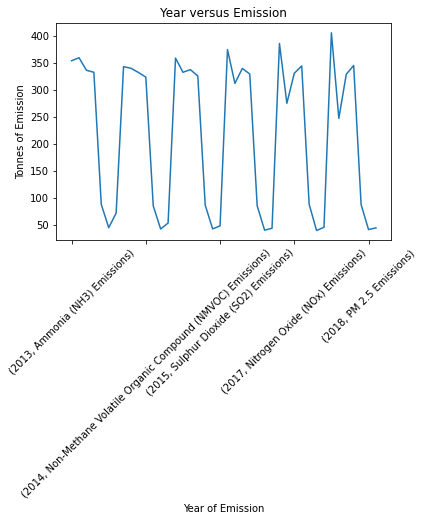

In [31]:
#Initial visualisation of dataset
total_emissions.plot(x="Year", y="VALUE", kind="line", rot=45)
plt.xlabel("Year of Emission")
plt.ylabel('Tonnes of Emission')
plt.title("Year versus Emission")

plt.show()

<---------------------------------------------------------------------------------------------------------------------------------------------------->

#MERGING THE DEATH RATE DATA AND THE ENVIRONMENTAL EMMISSIONS DATA

In [32]:
#Merging Dataframes, appending _der to death rate attributes, and _ems to emissions data
der_ems_df=der_df.merge(ems_df, on="Year", suffixes=("_der","_ems"))
der_ems_df.head(5)

Year Statistic_der Area of Residence UNIT_der  VALUE_der  DEATH_MEAN  \
0  2013        Deaths            Carlow   Number        389         689   
1  2013        Deaths            Carlow   Number        389         689   
2  2013        Deaths            Carlow   Number        389         689   
3  2013        Deaths            Carlow   Number        389         689   
4  2013        Deaths            Carlow   Number        389         689   

             Statistic_ems                               NACE Rev. 2 Sector  \
0  Ammonia (NH3) Emissions    Adjustment for Irish Resident Activity Abroad   
1  Ammonia (NH3) Emissions  Adjustment for Non-resident Activity in Ireland   
2  Ammonia (NH3) Emissions     Agriculture, forestry and fishing (01 to 03)   
3  Ammonia (NH3) Emissions                                       Households   
4  Ammonia (NH3) Emissions           Industries and construction (05 to 43)   

         UNIT_ems  VALUE_ems  TOTAL_EMISSIONS  
0  000 Tonnes NH3        0.0             9160  
1  000 Tonnes NH3        0.0             9160  
2  000 Tonnes NH3      116.6             9160  
3  000 Tonnes NH3        1.1             9160  
4  000 Tonnes NH3        0.2             9160

In [35]:
#df analysis
der_ems_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6720 entries, 0 to 6719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6720 non-null   int64  
 1   Statistic_der       6720 non-null   object 
 2   Area of Residence   6720 non-null   object 
 3   UNIT_der            6720 non-null   object 
 4   VALUE_der           6720 non-null   int64  
 5   DEATH_MEAN          6720 non-null   int64  
 6   Statistic_ems       6720 non-null   object 
 7   NACE Rev. 2 Sector  6720 non-null   object 
 8   UNIT_ems            6720 non-null   object 
 9   VALUE_ems           6720 non-null   float64
 10  TOTAL_EMISSIONS     6720 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 630.0+ KB


In [36]:
der_ems_df.isna().any()

Year                  False
Statistic_der         False
Area of Residence     False
UNIT_der              False
VALUE_der             False
DEATH_MEAN            False
Statistic_ems         False
NACE Rev. 2 Sector    False
UNIT_ems              False
VALUE_ems             False
TOTAL_EMISSIONS       False
dtype: bool

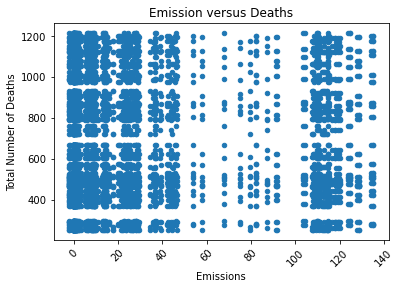

In [33]:
#Plot
der_ems_df.plot(x="VALUE_ems",y="VALUE_der", kind="scatter", rot=45)
plt.xlabel("Emissions")
plt.ylabel('Total Number of Deaths')
plt.title("Emission versus Deaths")

plt.show()

In [34]:
#Isolate an individual column
#ems_household=ems_df.loc[ems_df["NACE Rev. 2 Sector"]=="Households"]
#print(ems_household.head())